In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas_datareader import data as pdr #not exactly useful..is depriciated and has errors.
import datetime
from keras.models import load_model
import streamlit as st

In [2]:
import yfinance as yf
yf.pdr_override()

In [3]:
start= datetime.datetime(2000, 1, 1)
end =datetime.datetime(2024, 2, 28)

df = yf.download('^NSEI', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-21,22248.849609,22249.400391,21997.949219,22055.050781,22055.050781,364500
2024-02-22,22081.550781,22252.500000,21875.250000,22217.449219,22217.449219,343500
2024-02-23,22290.000000,22297.500000,22186.099609,22212.699219,22212.699219,226000
2024-02-26,22169.199219,22202.150391,22075.150391,22122.050781,22122.050781,207800
2024-02-27,22090.199219,22218.250000,22085.650391,22198.349609,22198.349609,252200


In [5]:
df = df.reset_index()

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [7]:
df = df.drop(['Date','Adj Close'], axis = 1)

In [8]:
df.head()

,Open,High,Low,Close,Volume
0,4518.450195,4549.049805,4482.850098,4494.649902,0
1,4494.100098,4551.799805,4481.549805,4546.200195,0
2,4550.250000,4739.000000,4550.250000,4732.350098,0
3,4734.850098,4760.850098,4721.149902,4747.549805,0
4,4752.950195,4855.700195,4733.700195,4837.549805,0


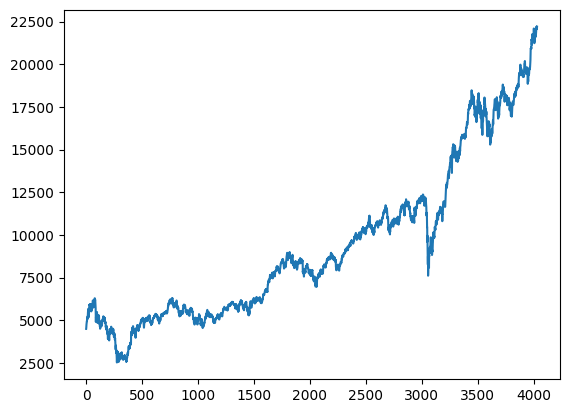

In [9]:
plt.plot(df.Close)

In [10]:
mvavg = df.Close.rolling(100).mean()
mvavg

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
4027    20660.912949
4028    20686.440449
4029    20711.402949
4030    20737.387949
4031    20762.988438
Name: Close, Length: 4032, dtype: float64

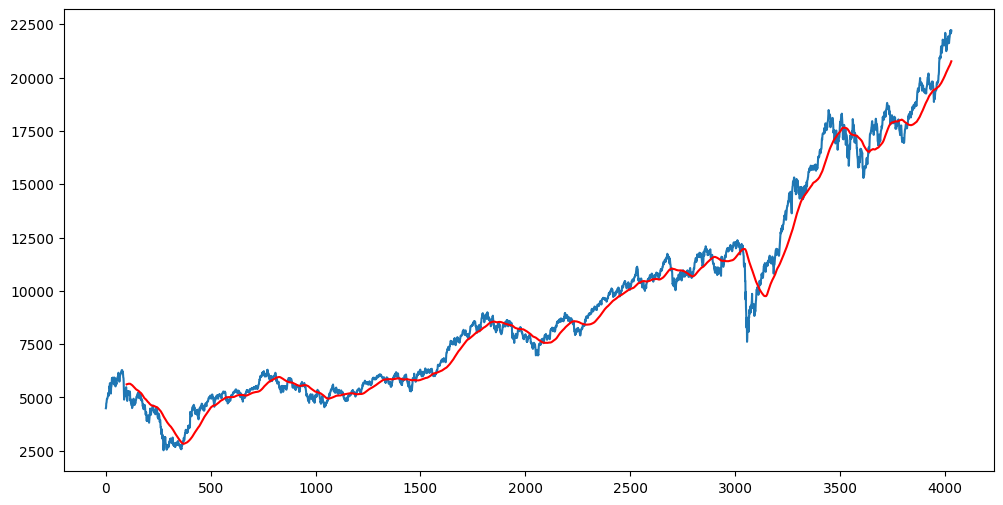

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mvavg, 'r')

In [12]:
mvavg1 = df.Close.rolling(200).mean()
mvavg1

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
4027    19909.987041
4028    19929.795283
4029    19950.513779
4030    19969.802031
4031    19989.464033
Name: Close, Length: 4032, dtype: float64

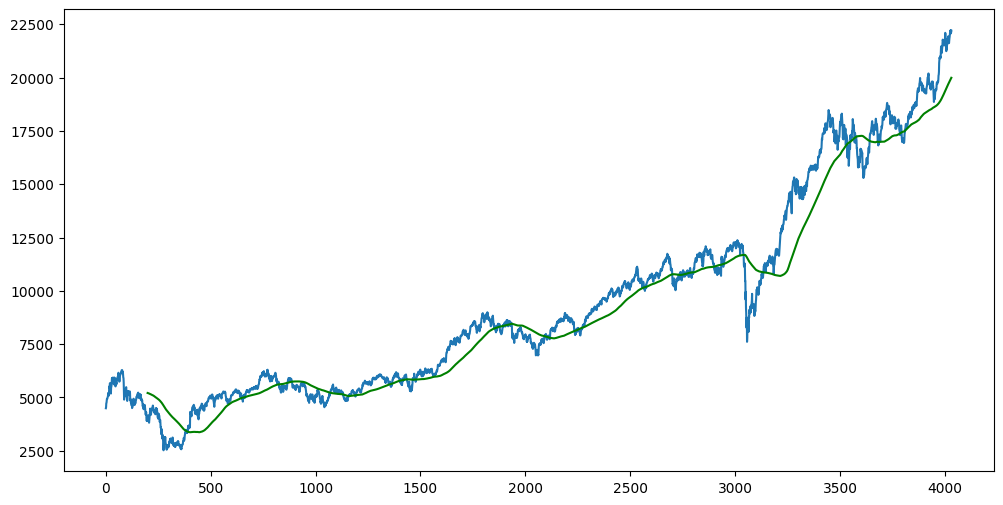

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mvavg1, 'g')

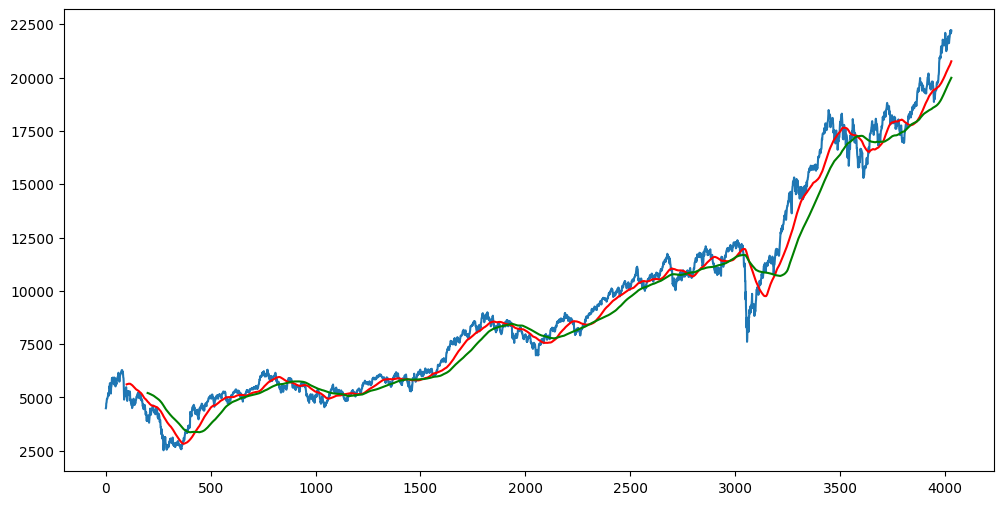

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mvavg, 'r')
plt.plot(mvavg1, 'g')

## SPLITTING DATA INTO TRAIN AND TEST DATA ##

In [15]:
dtrain = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

In [16]:
dtest = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [17]:
print(dtrain.shape)

(2822, 1)


In [18]:
print(dtest.shape)

(1210, 1)


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
#fitting the training data first
#this is done to scale the data down
dtarray = scaler.fit_transform(dtrain)
dtarray

array([[0.21384695],
       [0.21944155],
       [0.23964383],
       ...,
       [0.9924737 ],
       [0.99725429],
       [0.9897388 ]])

In [22]:
#splitting it into xtrain and ytrain/testing dDeprecationWarning
x_train = []
y_train = []



In [23]:
dtarray.shape

(2822, 1)

In [24]:
for i in range (100, dtarray.shape[0]):
    x_train.append(dtarray[i-100:i])
    y_train.append(dtarray[i,0])

#time series analysis analogy

In [25]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train.shape

(2722, 100, 1)

In [27]:
#ML model_

from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [28]:
model = Sequential()

In [29]:
#LSTM LAYER

model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1)) #connect all the layers

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error') #learn about this optimizers and losses
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
86/86 [==============================] - 33s 304ms/step - loss: 0.0425
Epoch 2/50
86/86 [==============================] - 24s 279ms/step - loss: 0.0091
Epoch 3/50
86/86 [==============================] - 26s 306ms/step - loss: 0.0084
Epoch 4/50
14/86 [===>..........................] - ETA: 21s - loss: 0.0062

In [ ]:
model.save('keras_model.keras')

In [ ]:
past_100_days = dtrain.tail(100)

In [ ]:
dtest.head()

In [ ]:
dtrain.tail()

In [ ]:
final_df = pd.concat([past_100_days, dtest], ignore_index=True)

final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
#making predictions

y_predicted = model.predict(x_test)
y_predicted.shape

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/6.90264547e-05

In [ ]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original PRICE')
plt.plot(y_predicted, 'r', label = 'Predicted PRICE')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


    